In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

# SIngle Input

In [2]:
class AgentState(TypedDict):
    """
    Represents the state of the agent.
    """
    message: str

In [3]:
a1 = AgentState(message="Hello, world!")

In [4]:
a1

{'message': 'Hello, world!'}

In [5]:
a2 = AgentState(message=1234)

In [6]:
a2

{'message': 1234}

In [7]:
def greeting_node(state: AgentState) -> AgentState:
    """
    A node that returns a greeting message.
    """
    state['message'] = "Hey " + state['message'] + ", how are you?"
    return state

In [8]:
greeting_node(state={'message': "Ajit"})

{'message': 'Hey Ajit, how are you?'}

In [9]:
graph = StateGraph(state_schema=AgentState)
graph

In [10]:
graph.add_node(node="greeting", action=greeting_node)

In [11]:
graph.set_entry_point(key="greeting")
graph.set_finish_point(key="greeting")

In [12]:
app = graph.compile()

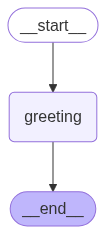

In [13]:
app

In [14]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'greeting': Node(id='greeting', name='greeting', data=greeting(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='greeting', data=None, conditional=False), Edge(source='greeting', target='__end__', data=None, conditional=False)])

In [15]:
app.invoke(input={'message': "Ajit"})

{'message': 'Hey Ajit, how are you?'}

In [16]:
result = app.invoke(input={'message': "Ajit Emmanuel"})
result

{'message': 'Hey Ajit Emmanuel, how are you?'}

# Multiple Input Graph

In [17]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [18]:
class AgentState(TypedDict):
    """
    Represents the state of the agent.
    """
    values: list[int ]
    name: str
    result: str

In [19]:
def process_values(state: AgentState) -> AgentState:
    """
    A node that processes a list of values.
    """
    state['result'] = f"Hi there {state['name']}! Your sum is {sum(state['values'])}."
    return state

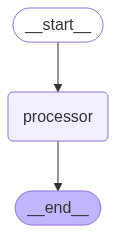

In [20]:
graph = StateGraph(state_schema=AgentState)
graph.add_node(node="processor", action=process_values)
graph.set_entry_point(key="processor")
graph.set_finish_point(key="processor")
app1 = graph.compile()
app1

In [21]:
app1.invoke(input={'values': [1, 2, 3], 'name': "Ajit"})

{'values': [1, 2, 3],
 'name': 'Ajit',
 'result': 'Hi there Ajit! Your sum is 6.'}

# Sequential Graph

In [22]:
class AgentState(TypedDict):
    """
    Represents the state of the agent.
    """
    name: str
    age: int
    final: str

In [23]:
def first_node(state: AgentState) -> AgentState:
    """
    A node that processes the first part of the state.
    """
    state['final'] = f"Hello {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """
    A node that processes the second part of the state.
    """
    state['final'] += f" You are {state['age']} years old."
    return state

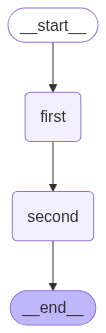

In [24]:
graph = StateGraph(state_schema=AgentState)
graph.add_node(node="first", action=first_node)
graph.add_node(node="second", action=second_node)

graph.add_edge(start_key ="first", end_key ="second")

graph.set_entry_point(key="first")
graph.set_finish_point(key="second")

app2 = graph.compile()
app2

In [25]:
app2.invoke(input={'name': "Ajit", 'age': 40})

{'name': 'Ajit', 'age': 40, 'final': 'Hello Ajit! You are 40 years old.'}

In [35]:
class AgentState(TypedDict):
    """
    Represents the state of the agent.
    """
    name: str
    age: int
    skills: list[str]
    result: str

In [36]:
def greeting_node(state: AgentState) -> AgentState:
    """
    A node that returns a greeting message.
    """
    state['result'] = f"Hello {state['name']}! How are you? Welcome to the  world of AI."
    return state

def age_node(state: AgentState) -> AgentState:
    """
    A node that processes the age.
    """
    state['result'] += f" You are {state['age']} years old."
    return state

def skills_node(state: AgentState) -> AgentState:
    """
    A node that processes the skills.
    """
    state['result'] += f" Your skills are: {', '.join(state['skills'])}."
    return state

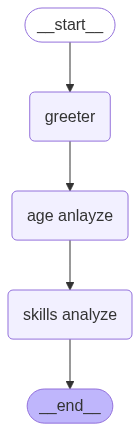

In [37]:
graph = StateGraph(state_schema=AgentState)
graph.add_node(node="greeter", action=greeting_node)
graph.add_node(node="age anlayze", action=age_node)
graph.add_node(node="skills analyze", action=skills_node)

graph.set_entry_point(key="greeter")
graph.add_edge(start_key="greeter", end_key="age anlayze")
graph.add_edge(start_key="age anlayze", end_key="skills analyze")
graph.set_finish_point(key="skills analyze")

app3 = graph.compile()
app3

In [38]:
result = app3.invoke(input={'name': "Ajit", 'age': 40, 'skills': ["Python", "AI", "ML"]})
result['result']

'Hello Ajit! How are you? Welcome to the  world of AI. You are 40 years old. Your skills are: Python, AI, ML.'

# Conditional Graph

In [39]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [40]:
class AgentState(TypedDict):
    """
    Represents the state of the agent.
    """
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [47]:
def adder(state: AgentState) -> AgentState:
    """
    A node that adds two numbers.
    """
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """
    A node that subtracts two numbers.
    """
    state['finalNumber'] = state['number1'] - state['number2']
    return state    

def decider(state: AgentState) -> str:
    """
    A node that decides which operation to perform.
    """
    if state['operation'] == '+':
        return "addition_operation"
    elif state['operation'] == '-':
        return "subtraction_operation" 

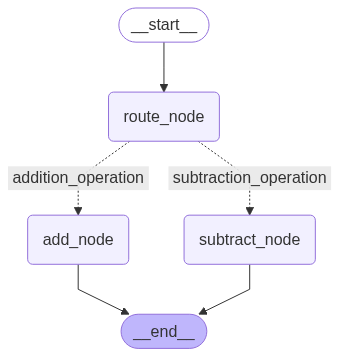

In [48]:
graph = StateGraph(state_schema=AgentState)
graph.add_node(node="add_node", action=adder)
graph.add_node(node="subtract_node", action=subtractor)
graph.add_node(node="route_node", action=lambda state: state)

graph.add_edge(start_key=START, end_key="route_node")
graph.add_conditional_edges(source="route_node", 
                            path=decider,
                            path_map={"addition_operation": "add_node", "subtraction_operation": "subtract_node"})

graph.add_edge(start_key="add_node", end_key=END)
graph.add_edge(start_key="subtract_node", end_key=END)

app4 = graph.compile()
app4

In [49]:
result = app4.invoke(input={'number1': 10, 'operation': '+', 'number2': 5})
result

{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}

In [50]:
result = app4.invoke(input={'number1': 10, 'operation': '-', 'number2': 5})
result

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}

# Conditional Graph wiht two router

In [52]:
class AgentState(TypedDict):
    """
    Represents the state of the agent.
    """
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    finalNumber: float

In [57]:
def add_node(state: AgentState) -> AgentState:
    """
    A node that adds two numbers.
    """
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtract_node(state: AgentState) -> AgentState:
    """
    A node that subtracts two numbers.
    """
    state['finalNumber'] = state['number2'] - state['number1']
    return state

def multiply_node(state: AgentState) -> AgentState:
    """
    A node that multiplies two numbers.
    """
    state['finalNumber'] *= state['number3']
    return state

def divide_node(state: AgentState) -> AgentState:
    """
    A node that divides two numbers.
    """
    if state['number4'] > 0:
        state['finalNumber'] /= state['number4']
    else:
        state['finalNumber'] = "Division by zero error"
    return state

In [58]:
def decider1(state: AgentState) -> str:
    """
    A node that decides which operation to perform for the first two numbers.
    """
    if state['operation1'] == '+':
        return "add_node"
    elif state['operation1'] == '-':
        return "subtract_node"
    
def decider2(state: AgentState) -> str:
    """
    A node that decides which operation to perform for the last two numbers.
    """
    if state['operation2'] == '*':
        return "multiply_node"
    elif state['operation2'] == '/':
        return "divide_node"

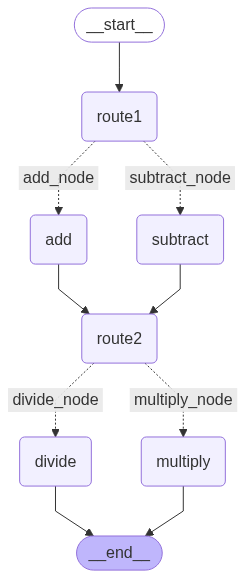

In [59]:
graph = StateGraph(state_schema=AgentState)

graph.add_node(node="add", action=add_node)
graph.add_node(node="subtract", action=subtract_node)
graph.add_node(node="multiply", action=multiply_node)
graph.add_node(node="divide", action=divide_node)

graph.add_node(node="route1", action=lambda state: state)
graph.add_node(node="route2", action=lambda state: state)

graph.add_edge(start_key=START, end_key="route1")
graph.add_conditional_edges(source="route1", 
                            path=decider1,
                            path_map={"add_node": "add", "subtract_node": "subtract"})
graph.add_edge(start_key="add", end_key="route2")
graph.add_edge(start_key="subtract", end_key="route2")
graph.add_conditional_edges(source="route2", 
                            path=decider2,
                            path_map={"multiply_node": "multiply", "divide_node": "divide"})
graph.add_edge(start_key="multiply", end_key=END)
graph.add_edge(start_key="divide", end_key=END)

app5 = graph.compile()
app5

In [60]:
result = app5.invoke(input={'number1': 10, 'number2': 5, 'number3': 20, 'number4': 4, 'operation1': '+', 'operation2': '*'})
result

{'number1': 10,
 'number2': 5,
 'number3': 20,
 'number4': 4,
 'operation1': '+',
 'operation2': '*',
 'finalNumber': 300}

In [63]:
result = app5.invoke(input={'number1': 10, 'number2': 5, 'number3': 20, 'number4': 4, 'operation1': '+', 'operation2': '/'})
result

{'number1': 10,
 'number2': 5,
 'number3': 20,
 'number4': 4,
 'operation1': '+',
 'operation2': '/',
 'finalNumber': 3.75}